In [159]:
# Author: Stanley A. Baronett
# Created on 9/14/19
# Last updated on 9/14/19
# 
# Homework 03: 4.5.1 Mandelbrot set

import numpy as np
from matplotlib import pyplot as plt
import timeit # check performance time

def GenerateMandelbrot(size, iters):
    """
    Generate and plot a Mandelbrot set with square grid size, "size" x "size,"
    and finite number of iterations, "iters."
    """
    start = timeit.default_timer() # start perf. timer
    
    a1, b1, points1 = -2, 2, size  # Side of x
    a2, b2, points2 = -2, 2, size  # Side of y
    N_iter = iters                 # the maximum number of iterations

    x_set = np.linspace(a1, b1, points1)
    y_set = np.linspace(a2, b2, points2)

    # Make an array to store the grid
    mandset = np.zeros([points1, points2], float)

    # Calculate the values in the array
    for i in range(len(y_set)): 
        for j in range(len(x_set)):

            # initial conditions
            z = 0        
            c = x_set[j] + y_set[i]*1j       
            inset = True

            # need to iterate it to see if the point satisfies the condition
            for k in range(N_iter):
                z = z**2 + c
                # print('values:  ', k,z,c)
                if np.absolute(z) > 2:
                    mandset[i, j] = k
                    inset = False
                    break
    
    # Make the plot
    title = "Mandelbrot Set (" + str(size) +  'x' + str(size) + ', ' + str(iters) + ' iterations)'
    fig = plt.figure(figsize=(5, 5), dpi = 400)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)
    plt.title(title)
    plt.imshow(mandset, origin="lower", extent=[a1,b1, a2,b2], cmap="hot")
    plt.colorbar()
    #plt.gray()
    plt.show()
    for item in [fig, ax]:
        item.patch.set_visible(False)
    with open('mandelbrot/code1.png', 'wb') as outfile:
        fig.canvas.print_png(outfile)
    
    stop = timeit.default_timer() # end perf. timer
    print('Time elapsed:', stop - start, 'sec')
    

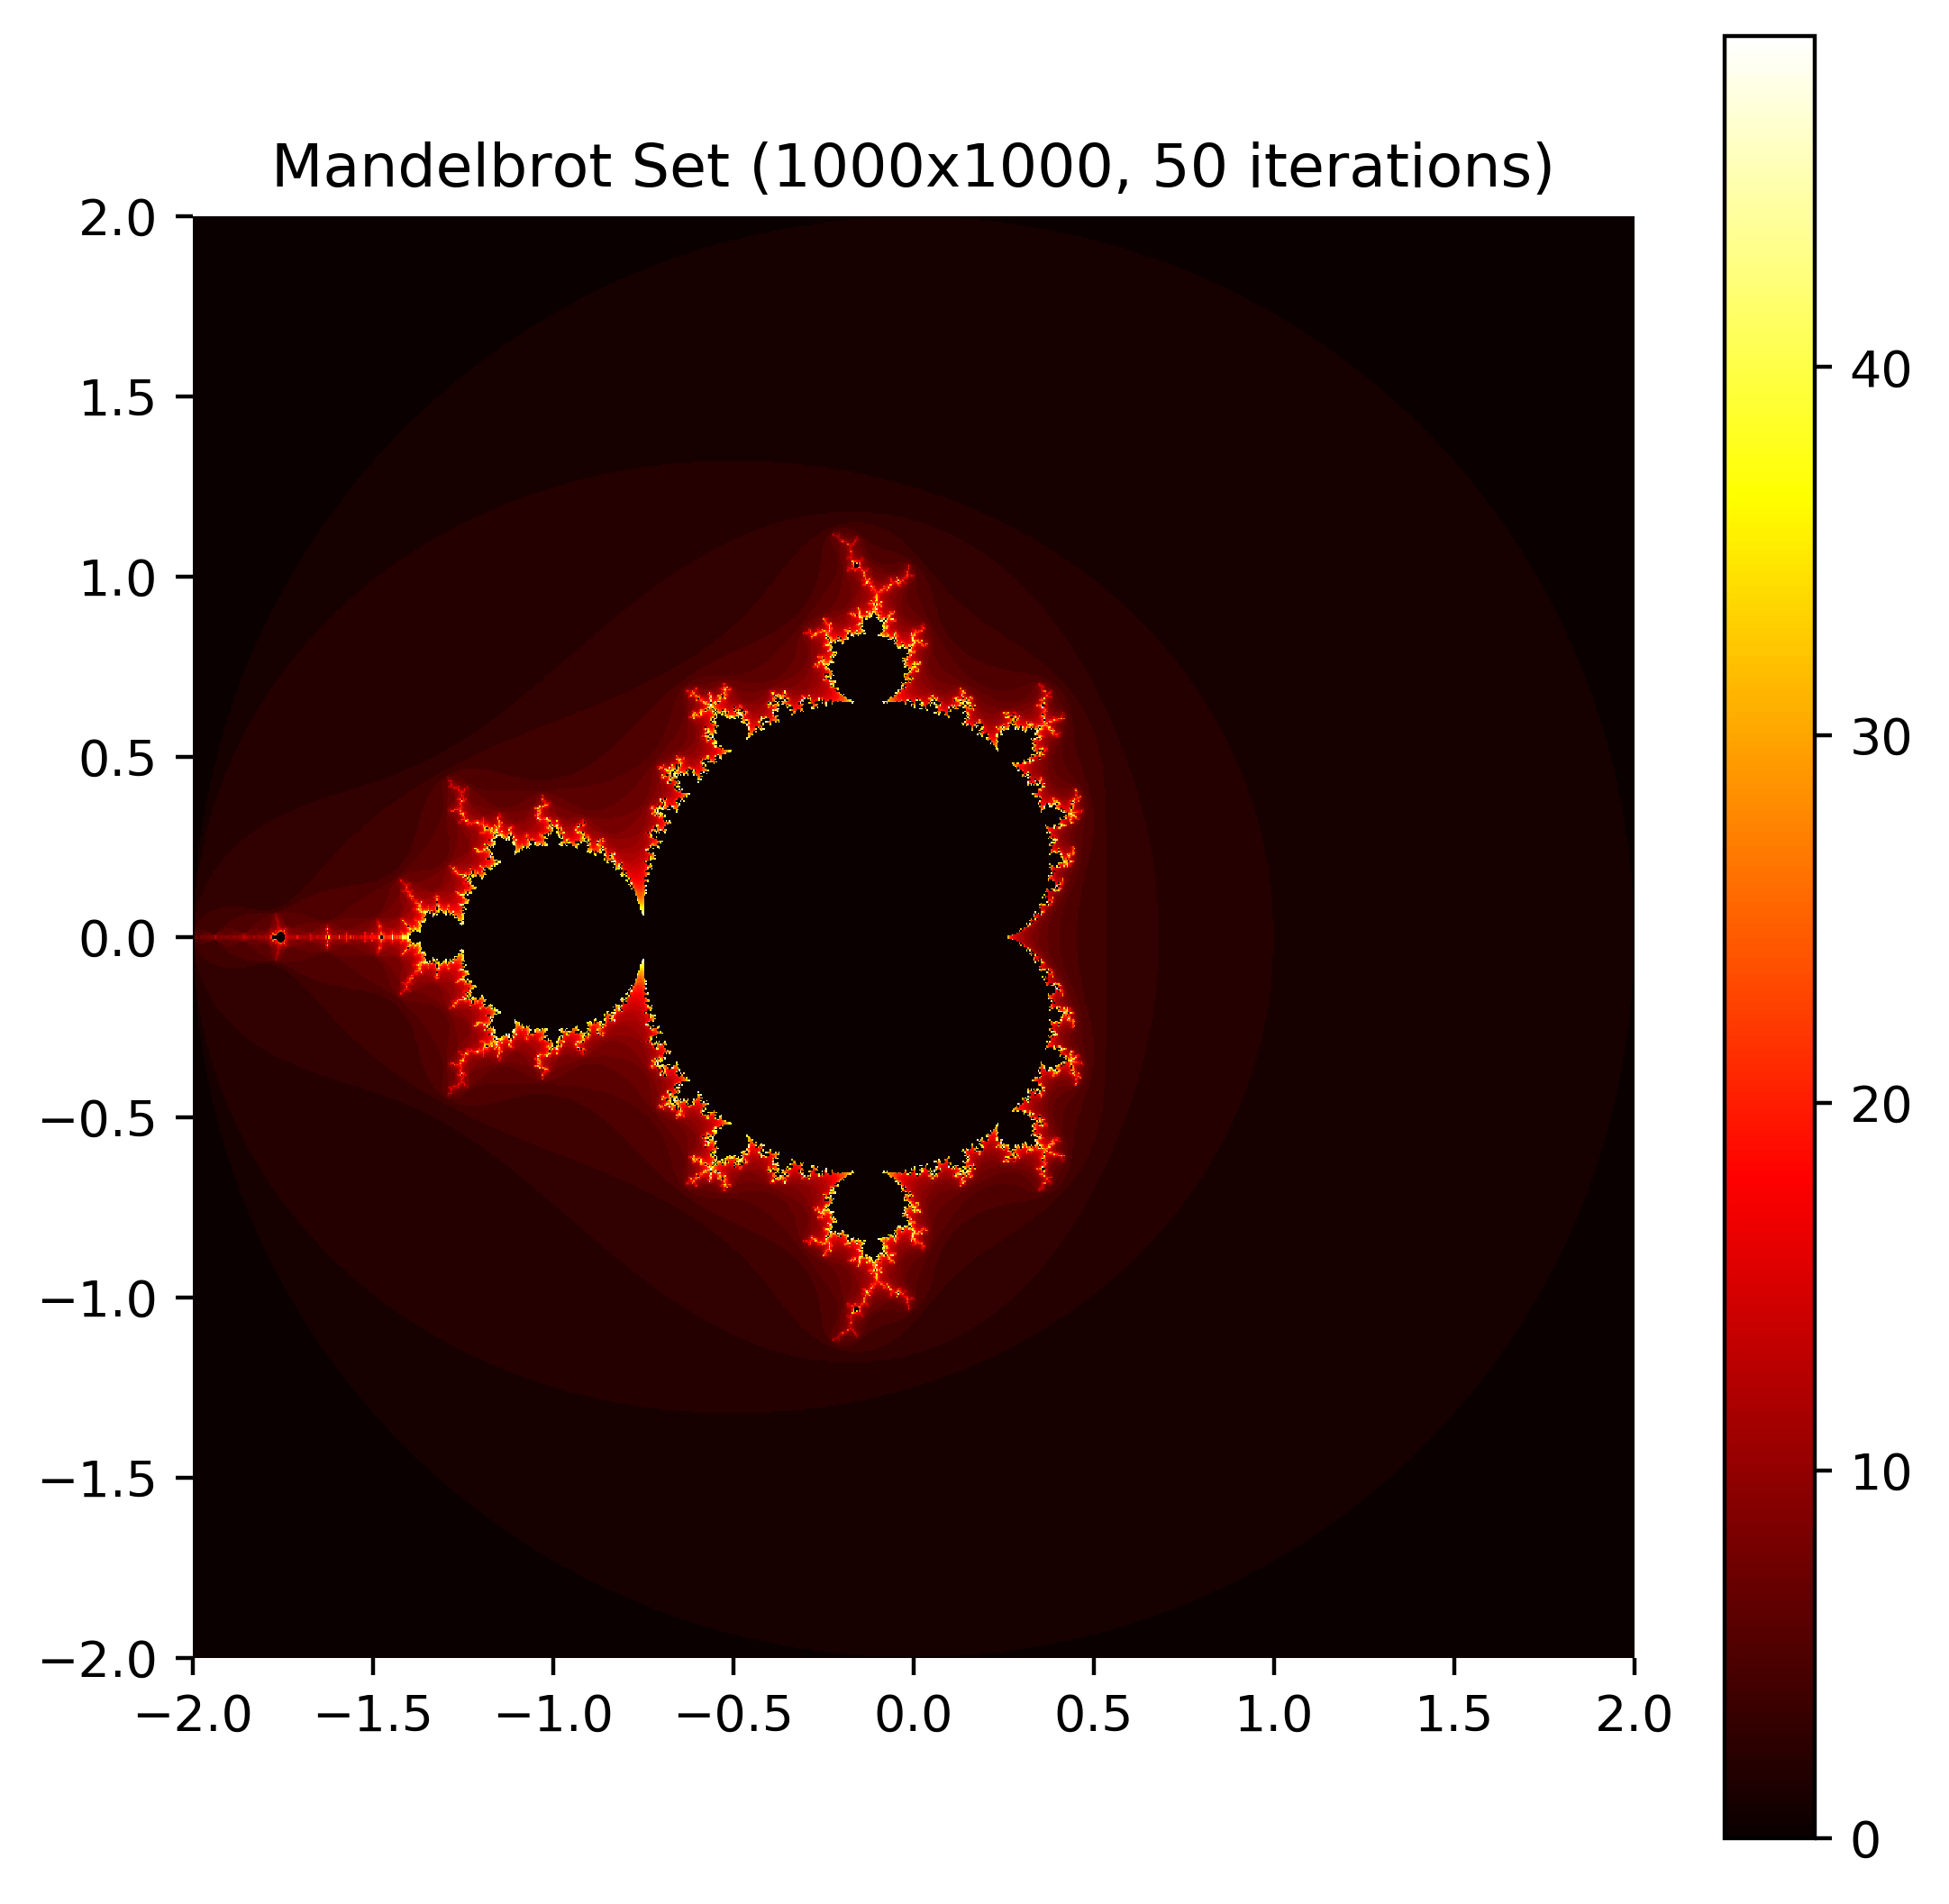

Time elapsed: 19.777110199999697 sec


In [160]:
GenerateMandelbrot(1000, 50)

In [173]:
import numpy as np
from matplotlib import pyplot as plt
import timeit # check performance time

def GenerateMandelbrot2(size, max_iters):
    """
    Generate and plot a Mandelbrot set with square grid size,
    "size" x "size," and finite number of maximum iterations,
    "max_iters." This version 2 utilizes numpy vectorization.
    """
    start = timeit.default_timer() # start perf. timer
    
    a1, b1, points1 = -2, 2, size  # Side of x
    a2, b2, points2 = -2, 2, size  # Side of y
    N_iter = max_iters                 # the maximum number of iterations

    x_set = np.linspace(a1, b1, points1, dtype=np.float32)
    y_set = np.linspace(a2, b2, points2, dtype=np.float32)
    c = x_set + y_set[:, None]*1j
    n = np.zeros(c.shape, dtype=int)
    z = np.zeros(c.shape, np.complex64)
    for i in range(N_iter):
        result = np.less(abs(z), 2)
        n[result] = i
        z[result] = z[result]**2 + c[result]
        n[n == N_iter-1] = 0

    log_2 = np.log(np.log(2))/np.log(2)
    with np.errstate(invalid='ignore'):
        m = np.nan_to_num(n + 1 - np.log(np.log(abs(z)))/np.log(2) + log_2)
    
    # Make the plot
    title = "Mandelbrot Set (" + str(size) +  'x' + str(size) + ', ' + str(max_iters) + ' iterations)'
    fig = plt.figure(figsize=(10, 10), dpi = 200)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)
    plt.title(title)
    plt.imshow(m, origin="lower", extent=[a1,b1, a2,b2], cmap="hot")
    plt.colorbar()
    #plt.gray()
    plt.show()
    for item in [fig, ax]:
        item.patch.set_visible(False)
    with open('mandelbrot/code2.png', 'wb') as outfile:
        fig.canvas.print_png(outfile)

    stop = timeit.default_timer() # end perf. timer
    print('Time elapsed:', stop - start, 'sec')
    

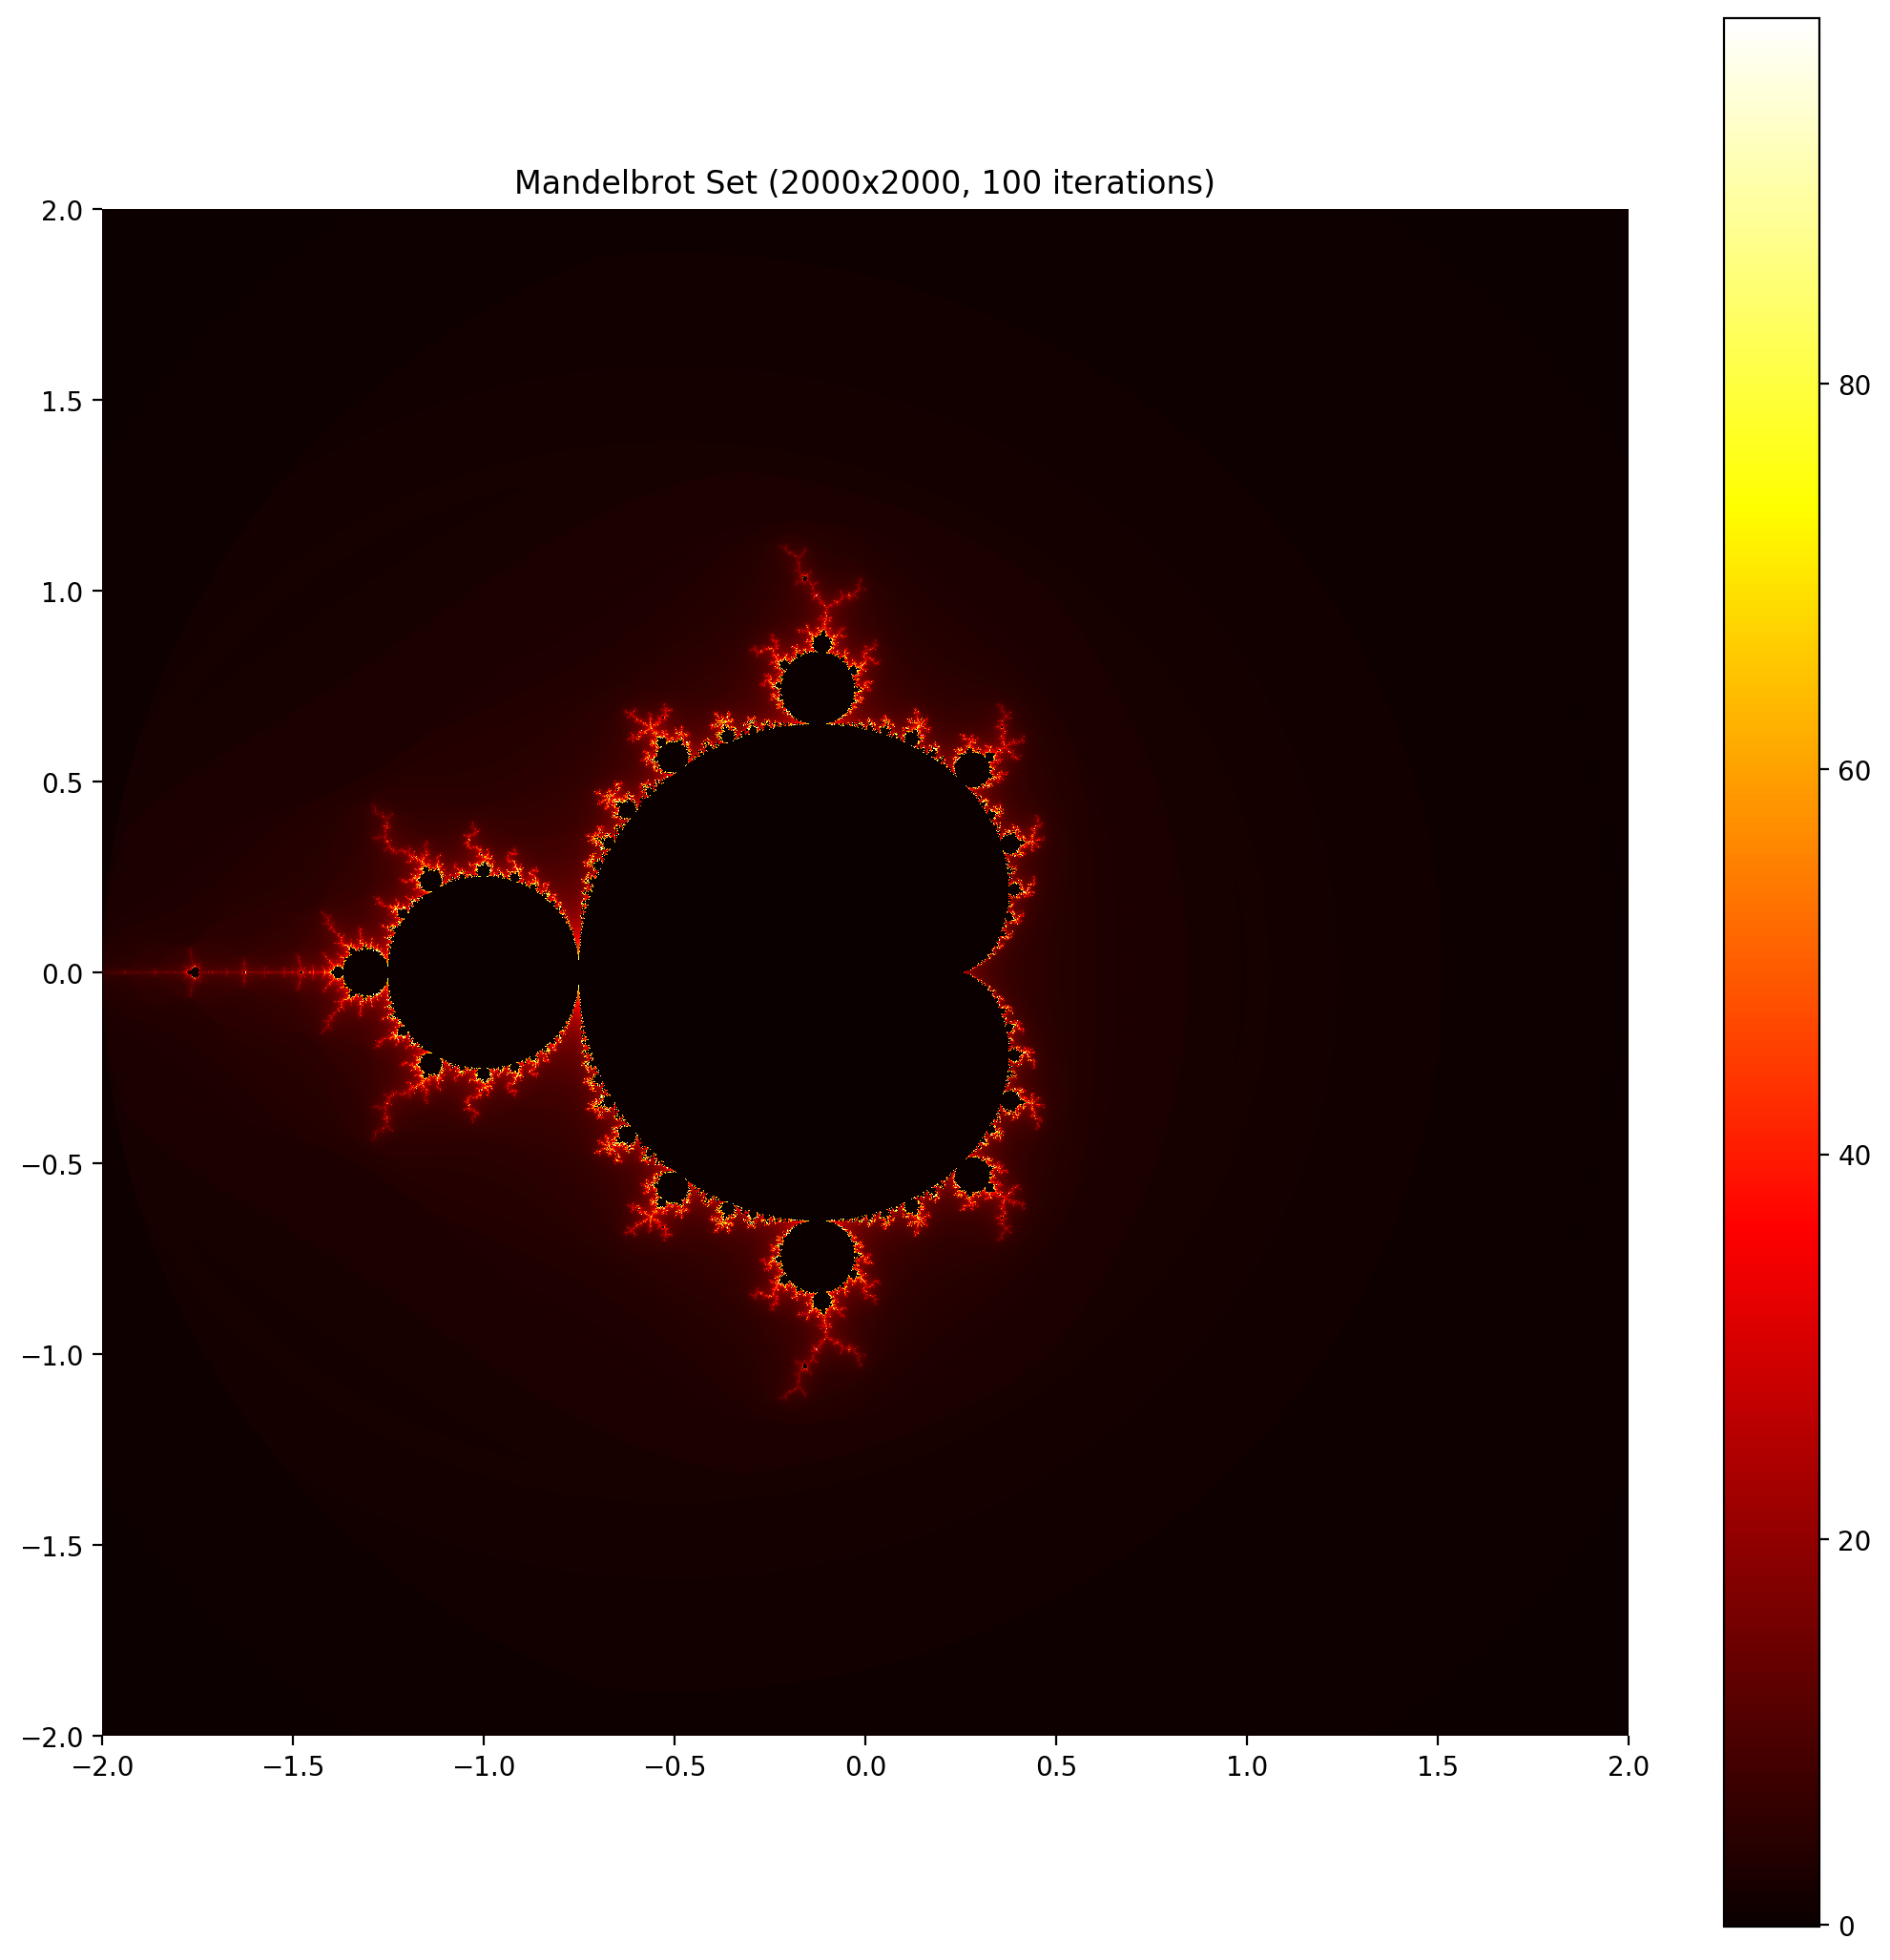

Time elapsed: 6.047429500000362 sec


In [174]:
GenerateMandelbrot2(2000, 100)

In [205]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

@jit
def MandelbrotJIT(real, imag, max_iter):
    """
    Utilizing Numba's just-in-time (JIT) computation,
    returns number of iterations (up to 'max_iter') that
    passed 'real' and 'imag' numbers (in complex plane)
    satisfy the Mandelbrot condition.
    """
    c = complex(real, imag)
    z = 0.0j
    
    for i in range(max_iter):
        z = z**2 + c
        if ((z.real**2 + z.imag**2) >= 4): # Mandelbrot condition
            return i
    return max_iter
    
@jit
def PlotMandelbrotJIT(size, max_iter):
    """
    Generates and plots Madelbrot set for a square grid of
    'size'x'size', with a maximum number of iterations,
    'max_iter'.
    """
    results = np.zeros([size, size])
    for x, real in enumerate(np.linspace(-2, 1, size)):
        for y, imag in enumerate(np.linspace(-1, 1, size)):
            results[x, y] = MandelbrotJIT(real, imag, max_iter)
    
    plt.figure(dpi=200)
    title = "Mandelbrot Set (" + str(size) +  'x' + str(size) + ', ' + str(max_iter) + ' iterations)'
    plt.title(title)
    plt.imshow(results.T, cmap='binary', interpolation='sinc', extent=[-2,1, -1, 1])
    plt.xlabel('$Re[c]$')
    plt.ylabel('$Im[c]$')
    plt.savefig('mandelbrot/code4.png', dpi=2400)

<ipython-input-205-f64bba30da75>:24: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "PlotMandelbrotJIT" failed type inference due to: Untyped global name 'str': cannot determine Numba type of <class 'type'>

File "<ipython-input-205-f64bba30da75>", line 37:
def PlotMandelbrotJIT(size, max_iter):
    <source elided>
    plt.figure(dpi=200)
    title = "Mandelbrot Set (" + str(size) +  'x' + str(size) + ', ' + str(max_iter) + ' iterations)'
    ^

  @jit
<ipython-input-205-f64bba30da75>:24: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "PlotMandelbrotJIT" failed type inference due to: cannot determine Numba type of <class 'numba.dispatcher.LiftedLoop'>

File "<ipython-input-205-f64bba30da75>", line 32:
def PlotMandelbrotJIT(size, max_iter):
    <source elided>
    results = np.zeros([size, size])
    for x, real in enumerate(np.linspace(-2, 1, size)):
    ^

  @jit
/home/stanley/

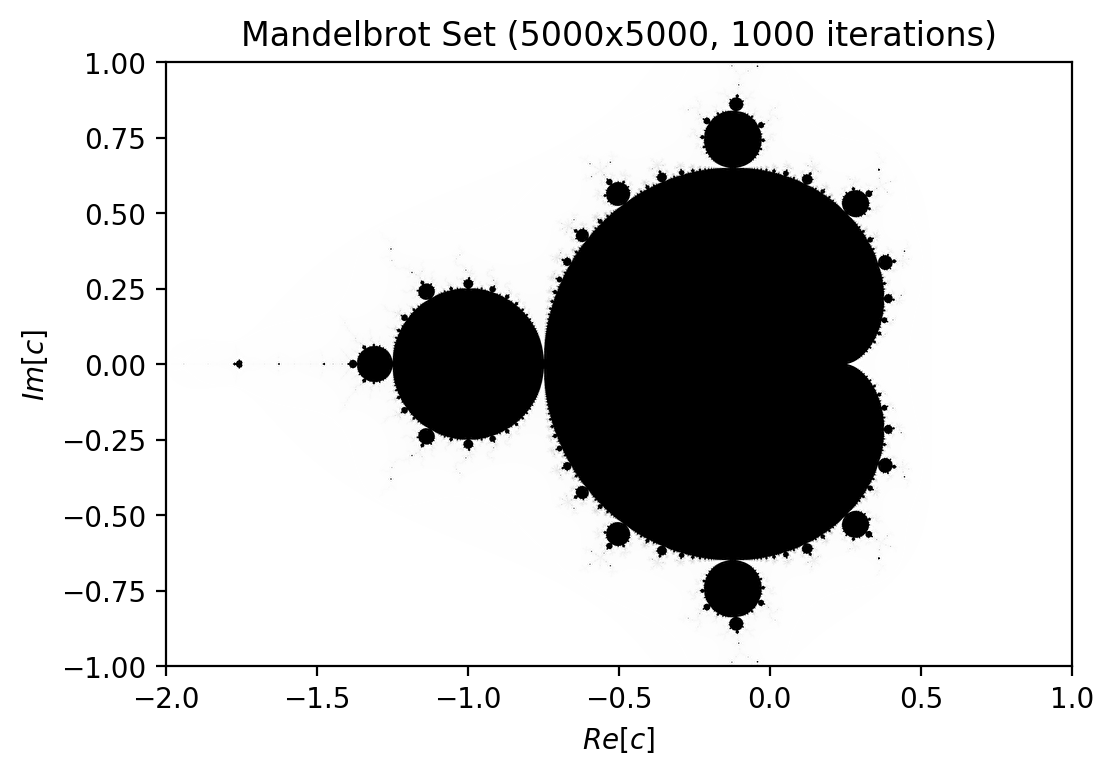

In [206]:
PlotMandelbrotJIT(5000, 1000)

For a high resolution plot of the same figure (2400 DPI), see "code4.png" in the "mandelbrot/" sub-directory.

In [ ]:
%timeit PlotMandelbrotJIT(2000,1000)